<a href="https://www.kaggle.com/code/alexchen510/city-happiness-analysis?scriptVersionId=164596575" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Importing the python library

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pylab as plt 
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv('/kaggle/input/city-happiness-index-2024/test.csv')
df2= pd.read_csv('/kaggle/input/city-happiness-index-2024/train.csv')

Step 1: Understanding the data


In [3]:
df1.shape

(51, 10)

In [4]:
df2.shape

(545, 10)

In [5]:
df1.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,Auckland,January,2030,55,Low,80,40,8.4,110,97
1,Berlin,January,2030,50,Low,60,45,7.9,80,93
2,Cairo,January,2030,75,Very High,15,110,4.1,55,69
3,Denver,January,2030,60,Medium,40,50,7.5,95,89
4,Edinburgh,January,2030,55,Low,65,55,7.8,85,92


In [6]:
df1.tail()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
46,Vancouver,September,2030,60,Medium,55,35,7.6,110,90
47,Wellington,September,2030,55,Low,80,30,8.4,90,94
48,Xalapa,September,2030,65,High,30,90,5.2,55,70
49,Yellowknife,September,2030,60,Low,55,40,7.3,100,88
50,Zagreb,September,2030,65,Medium,40,75,6.9,65,80


In [7]:
df2.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


In [8]:
df2.tail()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
540,St Arnaud,November,2029,55,Low,2405,20,-121.7,25,98
541,Murchison,December,2029,60,Medium,2410,35,-122.0,20,95
542,Reefton,December,2029,55,Low,2415,30,-122.3,25,96
543,Greymouth,December,2029,50,Low,2420,25,-122.6,20,97
544,Hokitika,December,2029,55,Low,2425,20,-122.9,25,98


In [9]:
#df1['City'].unique() 
df1['City'].nunique() # Count the unique value 
# No duplicate city 

51

In [10]:
#df2['City'].unique()
df2['City'].nunique()
# There are duplicate city 

227

In [11]:
df2['Year'].unique()
df2['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [12]:
df1['Year'].unique()
df1['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September'], dtype=object)

In [13]:
# Combined two CSV files into one dataframe
combined_df = pd.concat([df1,df2])

In [14]:
combined_df.shape

(596, 10)

In [15]:
combined_df.dtypes

City                     object
Month                    object
Year                      int64
Decibel_Level             int64
Traffic_Density          object
Green_Space_Area          int64
Air_Quality_Index         int64
Happiness_Score         float64
Cost_of_Living_Index      int64
Healthcare_Index          int64
dtype: object

In [16]:
combined_df.describe()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,2026.417785,57.340604,996.484899,40.486577,-40.434228,35.025168,92.283557
std,1.923307,7.201757,780.076123,37.593779,43.064520,26.043745,11.079778
min,2024.000000,50.000000,5.000000,5.000000,-122.900000,20.000000,35.000000
25%,2025.000000,55.000000,193.750000,25.000000,-78.275000,20.000000,95.000000
50%,2026.000000,55.000000,937.500000,30.000000,-33.650000,25.000000,96.000000
75%,2028.000000,60.000000,1681.250000,35.000000,4.200000,25.000000,97.000000
max,2030.000000,90.000000,2425.000000,245.000000,8.700000,130.000000,104.000000


Step 2: Data Preparation

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [17]:
combined_df.columns

Index(['City', 'Month', 'Year', 'Decibel_Level', 'Traffic_Density',
       'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score',
       'Cost_of_Living_Index', 'Healthcare_Index'],
      dtype='object')

In [18]:
combined_df = combined_df[['City', 
                           'Month', 
                           'Year', 
                           'Happiness_Score',
                           'Cost_of_Living_Index', 
                           'Healthcare_Index']]

In [19]:
#Rename columns
combined_df = combined_df.rename(columns = 
                                {'Happiness_Score': 'Happiness Score',
                                'Cost_of_Living_Index': 'Cost of Living Score', 
                                'Healthcare_Index': 'Healthcare Score'})

In [20]:
combined_df.head()

,City,Month,Year,Happiness Score,Cost of Living Score,Healthcare Score
0,Auckland,January,2030,8.4,110,97
1,Berlin,January,2030,7.9,80,93
2,Cairo,January,2030,4.1,55,69
3,Denver,January,2030,7.5,95,89
4,Edinburgh,January,2030,7.8,85,92


In [21]:
#Check for any null values in the dataframe 
combined_df.isna().sum()

City                    0
Month                   0
Year                    0
Happiness Score         0
Cost of Living Score    0
Healthcare Score        0
dtype: int64

In [22]:
#check for any duplicate values in the dataframe 
combined_df.duplicated().sum()

0

Step 3: Feature Understanding

Text(0.5, 0, 'Happiness Score')

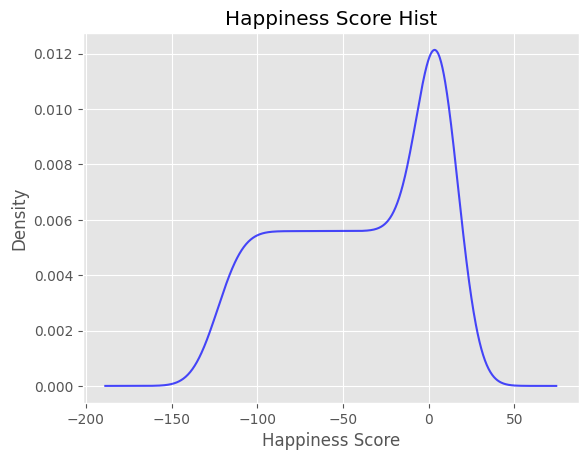

In [23]:
# kde of Happiness Score

ax = combined_df['Happiness Score'] \
    .plot(kind = 'kde', 
     title = 'Happiness Score Hist',
     color = 'blue',
     alpha = 0.7) 

ax.set_xlabel('Happiness Score')
                       

Text(0.5, 0, 'Cost of Living Score')

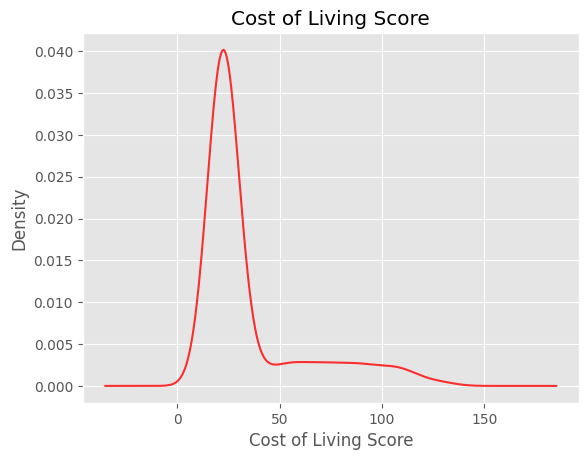

In [24]:
# kde of Cost Living 

ax = combined_df['Cost of Living Score']\
     .plot(kind= 'kde',
     title = 'Cost of Living Score', 
     color = 'red', 
     alpha = 0.8)

ax.set_xlabel('Cost of Living Score')

Text(0.5, 0, 'Healthcare Score')

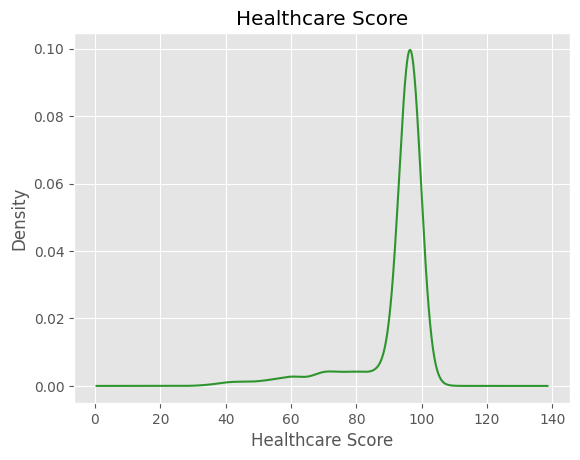

In [25]:
# kde of Heathcare Score

ax = combined_df['Healthcare Score']\
     .plot(kind= 'kde',
     title = 'Healthcare Score', 
     color = 'green', 
     alpha = 0.8)
ax.set_xlabel('Healthcare Score')

Step 4: Feature Relationships

* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby Comparisons

In [26]:
combined_df['City'].value_counts()

City
Greymouth           13
Hokitika            12
Reefton             10
Queenstown          10
Murchison           10
                    ..
Ho Chi Minh City     1
Brisbane             1
Canberra             1
New Plymouth         1
Canterbury           1
Name: count, Length: 252, dtype: int64

Test - Only looking into Greymouth

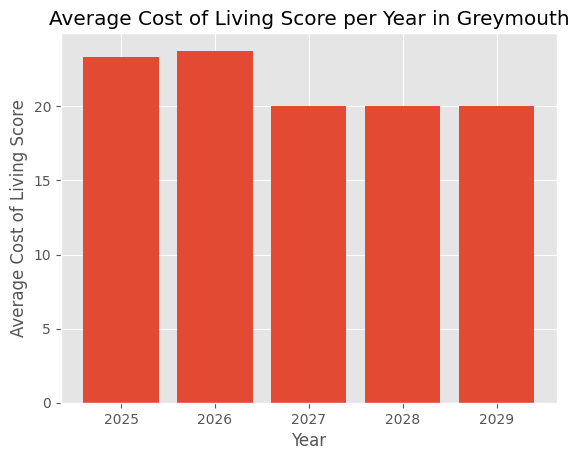

In [27]:
# Data Frame that filter City to Greymouth
greymouth_df = combined_df[combined_df['City'] =='Greymouth']

# Calculate the Avg Cost of Living Per Year 
yearly_avg_cls = greymouth_df.groupby('Year')['Cost of Living Score'].mean()
year = greymouth_df['Year'].unique()

# Create a figure object
fig, ax = plt.subplots()
ax.bar(year, yearly_avg_cls)

# Set the title and labels
ax.set_title('Average Cost of Living Score per Year in Greymouth')
ax.set_xlabel('Year')
ax.set_ylabel('Average Cost of Living Score')

# Display the plot
plt.show()

In [28]:
combined_df

,City,Month,Year,Happiness Score,Cost of Living Score,Healthcare Score
0,Auckland,January,2030,8.4,110,97
1,Berlin,January,2030,7.9,80,93
2,Cairo,January,2030,4.1,55,69
3,Denver,January,2030,7.5,95,89
4,Edinburgh,January,2030,7.8,85,92
...,...,...,...,...,...,...
540,St Arnaud,November,2029,-121.7,25,98
541,Murchison,December,2029,-122.0,20,95
542,Reefton,December,2029,-122.3,25,96
543,Greymouth,December,2029,-122.6,20,97


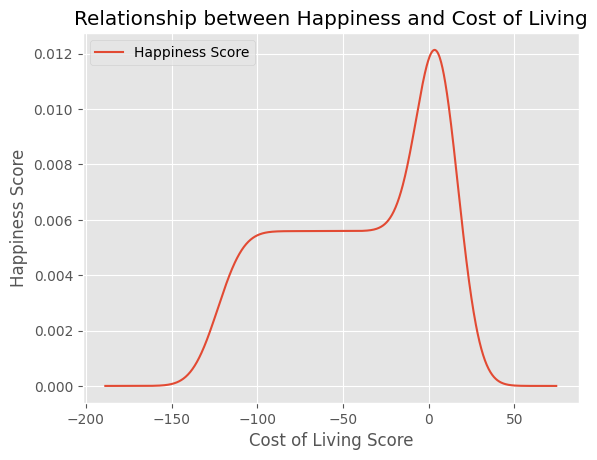

In [29]:
# KDE usinng pandas

ax = combined_df.plot(kind = 'kde',
                     x = 'Cost of Living Score',
                     y = 'Happiness Score',
                     title = 'Relationship between Happiness and Cost of Living')

ax.set_xlabel('Cost of Living Score')
ax.set_ylabel('Happiness Score')

plt.show()

In [30]:
combined_df.columns

Index(['City', 'Month', 'Year', 'Happiness Score', 'Cost of Living Score',
       'Healthcare Score'],
      dtype='object')

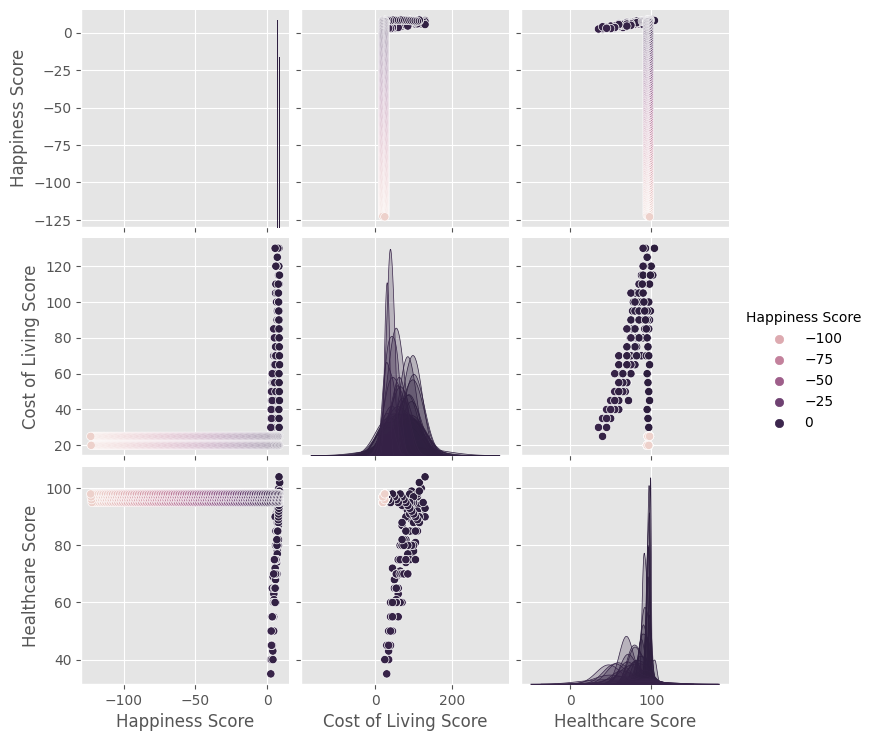

In [31]:
# Pairplot using SNS 

combined_df = combined_df.dropna()

sns.pairplot(data = combined_df,
             vars = ['Happiness Score', 'Cost of Living Score',
       'Healthcare Score'],
        hue = 'Happiness Score')

plt.show()

<Axes: >

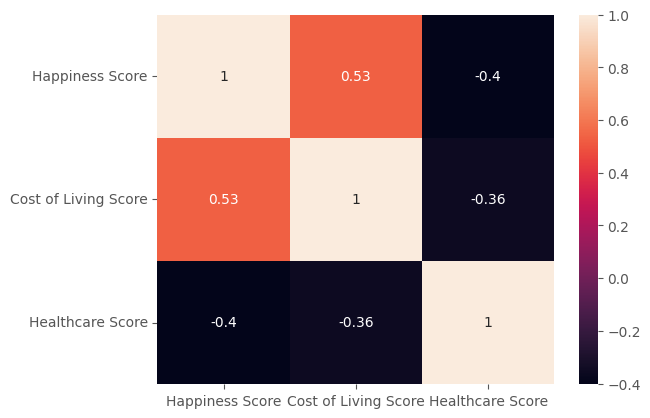

In [32]:
#dataframe to show correlation 
combined_df_corr = combined_df[['Happiness Score', 'Cost of Living Score','Healthcare Score']].corr()

#Showing heatmap of correlation 

sns.heatmap(data = combined_df_corr,
            annot = True
)